# correlation

In [1]:
import warnings
warnings.simplefilter("ignore")
from scipy import stats
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import seaborn as sns

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        # DomeF
        # 南緯77度19分01秒 東経39度42分12秒座標: 南緯77度19分01秒 東経39度42分12秒
        sx=14 ; sy=60 #;; # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy


df_lon,df_lat,df_x,df_y = Site().DomeF()

In [4]:
def Mon():
    import pandas as pd
    mons = pd.DataFrame({
            "name": ["Jan", "Feb", "Mar","Apr","May","Jun",\
                     "Jul","Aug","Sep","Oct","Nov","Dec","Jan"], 
            "days": [31,28,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc":[0,31,59,90,120,151,181,212,243,273,304,334,365], 
            "days_lp": [31,29,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc_lp":[0,31,60,91,121,152,182,213,244,274,305,335,366]             
            })
    return mons
mons=Mon()

In [39]:
def draw_d18O2(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["corr_temp"],label="Surface Air Temperature",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["corr_temp"],\
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax.plot(    x,   df["corr_prcp"],label="Daily Precipitation",
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["corr_prcp"],\
               marker="o"   ,linewidths=2, c="darkgreen",edgecolor="darkgreen")
    ax.plot(    x,   df["corr_sam" ],label="SAM-index"  ,
            linewidth=1 ,                  color="blue")
    ax.scatter( x,   df["corr_sam"],\
               marker="o"   ,linewidths=2, c="blue"     ,edgecolor="blue")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (-0.6,0.6))
    ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
    ax.axhline(y= 0.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y=-0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.8,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.8,ls='--',linewidth=0.5, color='k')
    ax.legend(loc="center")
    #
    ax.set_ylabel("Correlation coefficient")

In [38]:
def draw_d18O3(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["corr_temp"],label="Surface Air Temperature",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["corr_temp"],\
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax.plot(    x,   df["corr_prcp"],label="Daily Precipitation",
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["corr_prcp"],\
               marker="o"   ,linewidths=2, c="darkgreen",edgecolor="darkgreen")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (-0.6,0.6))
    ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
    ax.axhline(y= 0.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y=-0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.8,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.8,ls='--',linewidth=0.5, color='k')
    ax.legend(loc="center")
    #
    ax.set_ylabel("Correlation coefficient")

In [7]:
loadfile = "T2.npz"
dataset = np.load(loadfile)
T2 = dataset["T2"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y = dataset["y"]
m = dataset["m"]
d = dataset["d"]

In [8]:
loadfile = "prcp.npz"
dataset = np.load(loadfile)
prcp = dataset["prcp"]

In [9]:
loadfile = "prcp_d18O.npz"
dataset = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]

In [10]:
loadfile = "sam.npz"
dataset = np.load(loadfile)
sam  = dataset["sam"][:]

In [11]:
temp_df = T2  [df_x-1, df_y-1, :]
prcp_df = prcp[df_x-1, df_y-1, :]
# removing abnormal values
is_r_prcp_d18O = np.squeeze(prcp_d18O[df_x-1, df_y-1,:]<-125)
prcp_d18O_df   = np.zeros(len(m))
prcp_d18O_df   = prcp_d18O[df_x-1, df_y-1,:]
prcp_d18O_df[is_r_prcp_d18O] = np.nan

In [12]:
df_all = pd.DataFrame.from_dict({
    "Number": np.zeros((len(prcp_d18O_df))),
    "Year": y,
    "Mon" : m,
    "Date": d,
    "d18O": prcp_d18O_df,
    "temp": temp_df     ,
    "prcp": prcp_df     ,
    "sam" : sam         ,
},orient="columns")

In [13]:
df_all = df_all.dropna(how="any")
num = np.zeros(12)
for mm in range(12):
    num[mm] = len(df_all[df_all["Mon"]==mm+1])

## Parametric test

In [14]:
def shapiro(varin, var, p_value=0.05):
    df_out = pd.DataFrame.from_dict({
        "t":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        norm=(df[var]-np.nanmean(df[var]))/(np.nanstd(df[var])/len(df[var]))
        if len(df) < 3:
            df_out["t"][mm], df_out["p"][mm] = np.nan, np.nan
        else:
            df_out["t"][mm], df_out["p"][mm] = stats.shapiro(df[var])
    return df_out.T

In [15]:
# Normalization
for var in ["d18O","temp","prcp","sam"]:
    print(var)
    display(shapiro(df_all[["Mon",var]], var)   )

d18O


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,9.613182e-01,0.994483,0.994710,0.997300,0.997672,0.997767,0.997185,0.996708,0.997283,0.996011,0.988117,9.657328e-01
p,5.633959e-15,0.003521,0.002463,0.141029,0.219145,0.275003,0.108617,0.052258,0.146674,0.027844,0.000001,5.644882e-14


temp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,9.771250e-01,0.995536,0.996093,9.795567e-01,0.990445,9.804159e-01,0.989496,9.775021e-01,0.991985,0.995996,0.990196,9.859263e-01
p,6.507298e-11,0.014854,0.019528,6.492106e-10,0.000010,1.335615e-09,0.000004,9.638172e-11,0.000101,0.027224,0.000011,8.581308e-08


prcp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,6.664805e-01,5.781267e-01,5.658171e-01,4.987428e-01,0.439387,0.43685,5.214988e-01,5.281261e-01,5.716207e-01,0.153537,4.927961e-01,7.005506e-01
p,3.472646e-39,5.077325e-41,5.479077e-43,1.401298e-44,0.000000,0.00000,2.802597e-44,4.203895e-44,6.053609e-42,0.000000,1.261169e-44,1.099606e-37


sam


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,0.990830,9.836976e-01,0.994124,9.844801e-01,0.991352,0.990945,0.993505,9.582664e-01,0.992364,0.994130,9.861568e-01,9.789345e-01
p,0.000015,4.165963e-08,0.001066,3.558043e-08,0.000030,0.000026,0.000487,1.485588e-15,0.000161,0.002091,1.817585e-07,2.430285e-10


In [16]:
def std(varin, var):
    df_out = pd.DataFrame.from_dict({
        "std":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["std"][mm] = np.nanstd(df[var])

    return df_out.T

In [17]:
# Standard deviation
for var in ["d18O","temp","prcp","sam"]:
    print(var)
    display(std(df_all[["Mon",var]], var)   )

d18O


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,7.605598,13.659675,10.604718,11.72946,13.711078,13.52576,14.517352,13.684794,13.091477,15.669466,13.061379,7.666825


temp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,3.588575,6.4093,6.759414,6.956179,8.347626,8.537142,8.666239,7.516595,7.225634,7.427411,6.013976,3.463841


prcp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,0.245274,0.163987,0.111699,0.15215,0.147553,0.201981,0.151323,0.10282,0.08621,0.30744,0.178029,0.28899


sam


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,0.760275,0.8322,0.809772,0.914783,1.160896,1.126814,1.230036,1.088058,1.097682,0.976694,0.936578,0.941106


In [18]:
df_std = pd.DataFrame(data=[num,
                            std(df_all[["Mon","temp"]], "temp").T["std"].values / np.nanstd(df_all[["temp"]]),
                            std(df_all[["Mon","d18O"]], "d18O").T["std"].values / np.nanstd(df_all[["d18O"]]),
                            std(df_all[["Mon","prcp"]], "prcp").T["std"].values / np.nanstd(df_all[["prcp"]]),
                            std(df_all[["Mon","sam" ]], "sam").T["std"].values  / np.nanstd(df_all[["sam"]]),

          ], columns=mons["name"][:12],
    index=["Number","temp","d18O", "prcp", "sam"]).T
df_std.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,930.000000,847.000000,930.000000,900.000000,926.000000,896.000000,922.000000,923.000000,884.000000,853.000000,893.000000,930.000000
temp,0.228448,0.408015,0.430303,0.442829,0.531409,0.543473,0.551691,0.478505,0.459983,0.472828,0.382849,0.220508
d18O,0.297849,0.534938,0.415300,0.459347,0.536951,0.529694,0.568526,0.535922,0.512687,0.613645,0.511508,0.300247
prcp,1.258443,0.841379,0.573101,0.780645,0.757057,1.036319,0.776401,0.527543,0.442325,1.577402,0.913423,1.482741
sam,0.759827,0.831710,0.809296,0.914244,1.160212,1.126150,1.229312,1.087418,1.097036,0.976119,0.936027,0.940552


In [35]:
def draw_std(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["temp"],label="Surface Air Temperature",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["temp"],
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")

    ax.plot(    x,   df["d18O" ],label="$\mathsf{\delta^{18}O_p}$"  ,
            linewidth=1 ,                  color="magenta")
    ax.scatter( x,   df["d18O"],
               marker="o"   ,linewidths=2, c="magenta"     ,edgecolor="magenta")
    ax.plot(    x,   df["prcp" ],label="Daily precipitation"  ,
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["prcp"],
               marker="o"   ,linewidths=2, c="darkgreen"     ,edgecolor="darkgreen")
    ax.plot(    x,   df["sam" ],label="Daily SAM-index"  ,
            linewidth=1 ,                  color="blue")
    ax.scatter( x,   df["sam"],
               marker="o"   ,linewidths=2, c="blue"     ,edgecolor="blue")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (0,1.6))
    ax.axhline(y= 1.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y= 1.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')

    ax.legend(loc="lower center")
    #
    ax.set_ylabel("monthly SD / Annual SD")


In [36]:
def draw_std2(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["temp"]* np.nanstd(df_all[["temp"]]),label="Surface Air Temperature",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["temp"]* np.nanstd(df_all[["temp"]]),
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax2=ax.twinx()
    ax2.plot(    x,   df["d18O" ]* np.nanstd(df_all[["d18O"]]),label="$\mathsf{\delta^{18}O_p}$"  ,
            linewidth=1 ,                  color="magenta")
    ax2.scatter( x,   df["d18O"]* np.nanstd(df_all[["d18O"]]),
               marker="o"   ,linewidths=2, c="magenta"     ,edgecolor="magenta")

    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
#    ax.set_ylim( (0.4,1.4))
#    ax.axhline(y= np.nanstd(df_all[["temp"]]),ls='-' ,linewidth=0.5, color='k')
#    ax2.axhline(y= np.nanstd(df_all[["d18O"]]),ls='-' ,linewidth=0.5, color='k')
#    plt.text(x[0]-0.2, np.nanstd(df_all[["d18O"]])+0.3,"Annual SD")

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    plt.legend(h1+h2, l1+l2, loc='lower center')
    #
    ax.set_ylabel("Surface Air Temperature [\u00b0C]")
    ax2.set_ylabel("$\mathsf{\delta^{18}O_p}$ [\u2030]")


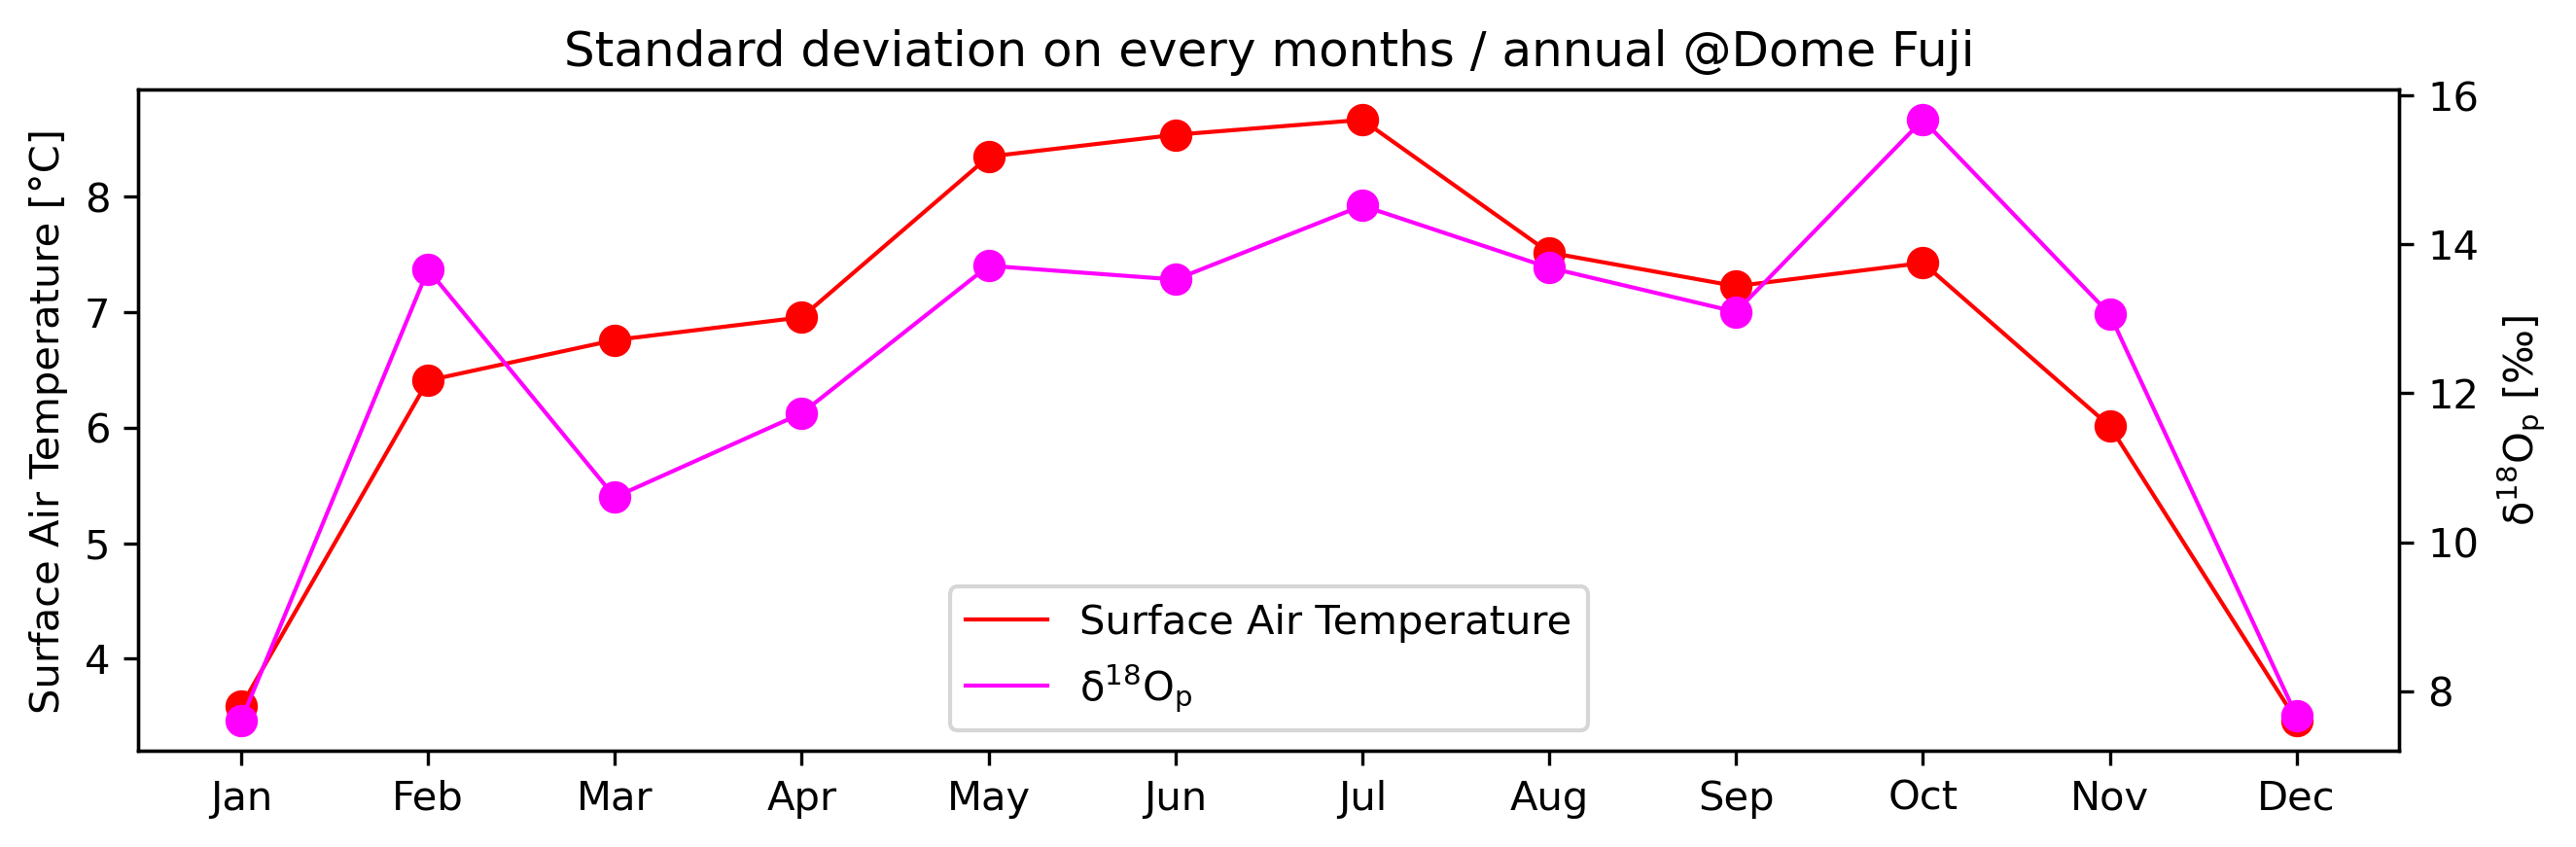

In [37]:
fig = plt.figure(figsize=(10,3)) 
ax = draw_std2(df_std)
plt.title("Standard deviation on every months / annual @Dome Fuji")
plt.show()
fig.savefig("std_raw.png")

In [24]:
def pearson(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.pearsonr(df[var1],df[var2])
    return df_out.T.round(3) 

In [25]:
df_corr = pd.DataFrame(data=[num,
          pearson(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          pearson(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          pearson(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values
          ], columns=mons["name"][:12],
    index=["Number","corr_temp", "corr_prcp", "corr_sam"]).T
df_corr.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,930.000,847.000,930.000,900.000,926.000,896.000,922.000,923.000,884.000,853.000,893.000,930.000
corr_temp,0.013,0.582,0.530,0.470,0.523,0.566,0.571,0.530,0.488,0.593,0.420,0.017
corr_prcp,-0.390,-0.011,0.363,0.427,0.344,0.408,0.396,0.354,0.353,0.191,-0.124,-0.400
corr_sam,-0.066,-0.091,-0.176,-0.207,-0.300,-0.394,-0.483,-0.426,-0.352,-0.285,-0.167,-0.106


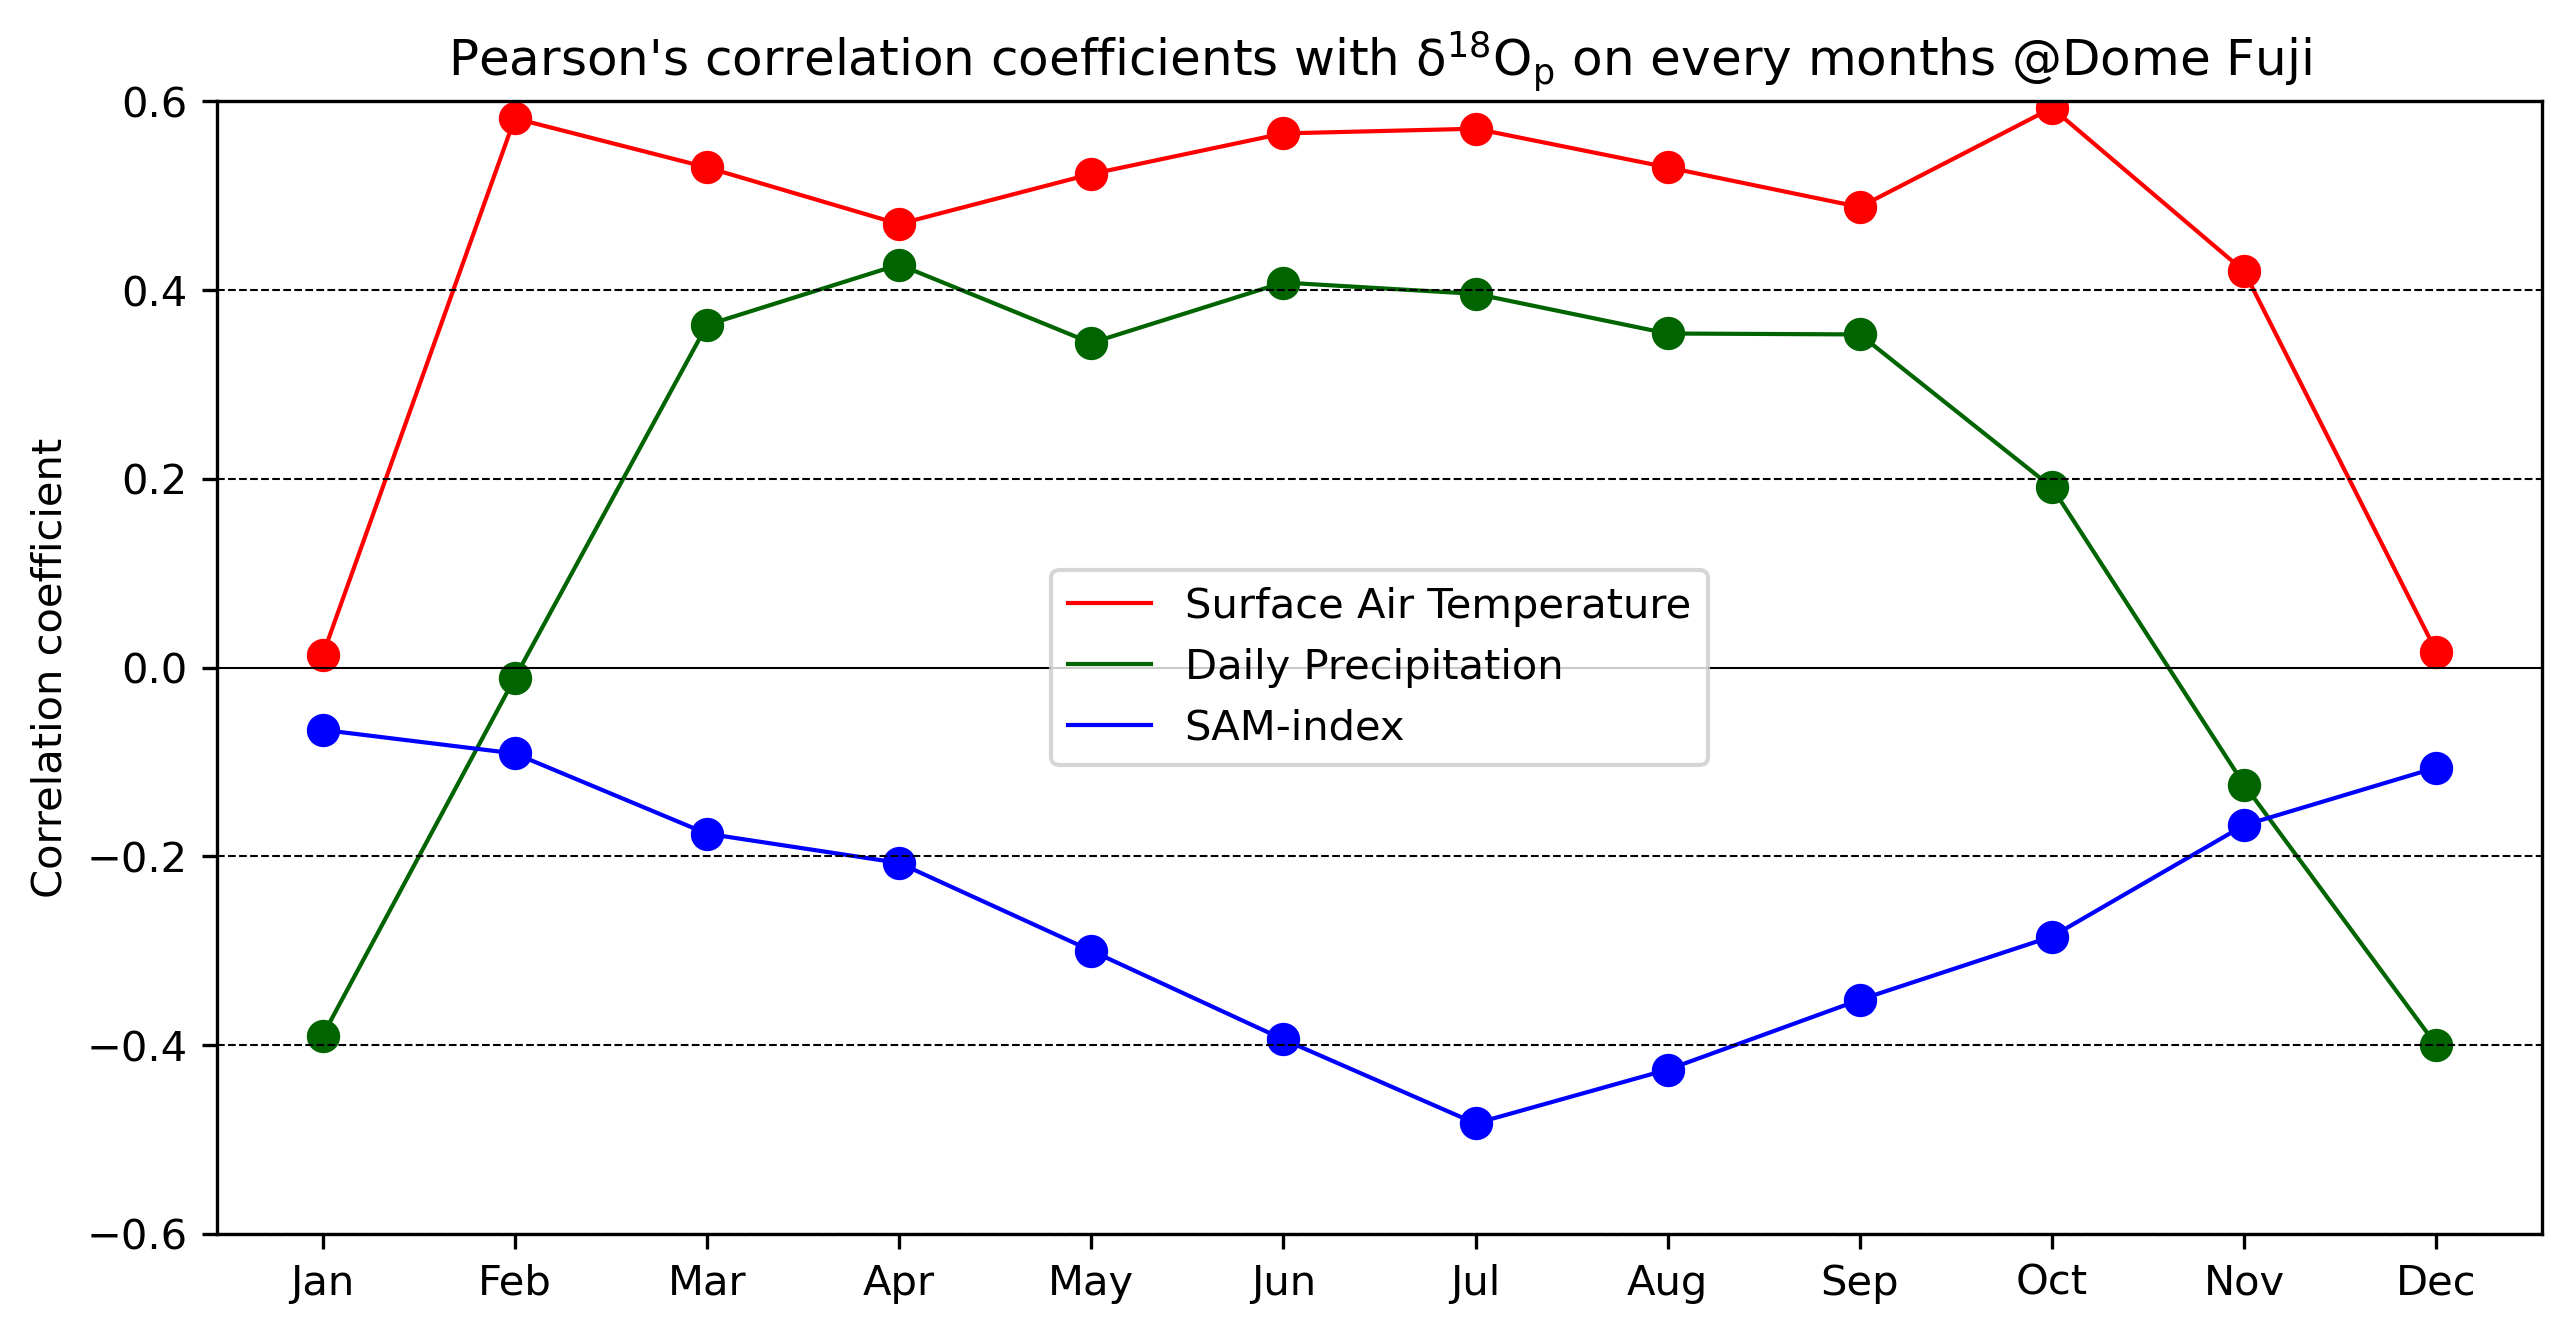

In [40]:
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_corr)
plt.title("Pearson's correlation coefficients with $\mathsf{\delta^{18}O_p}$ on every months @Dome Fuji")
plt.show()
fig.savefig("correlation_raw.png")

## Non-parametric tests

In [28]:
p_value=0.05

In [32]:
def spearmanr(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.spearmanr(df[var1],df[var2])
    return df_out.T

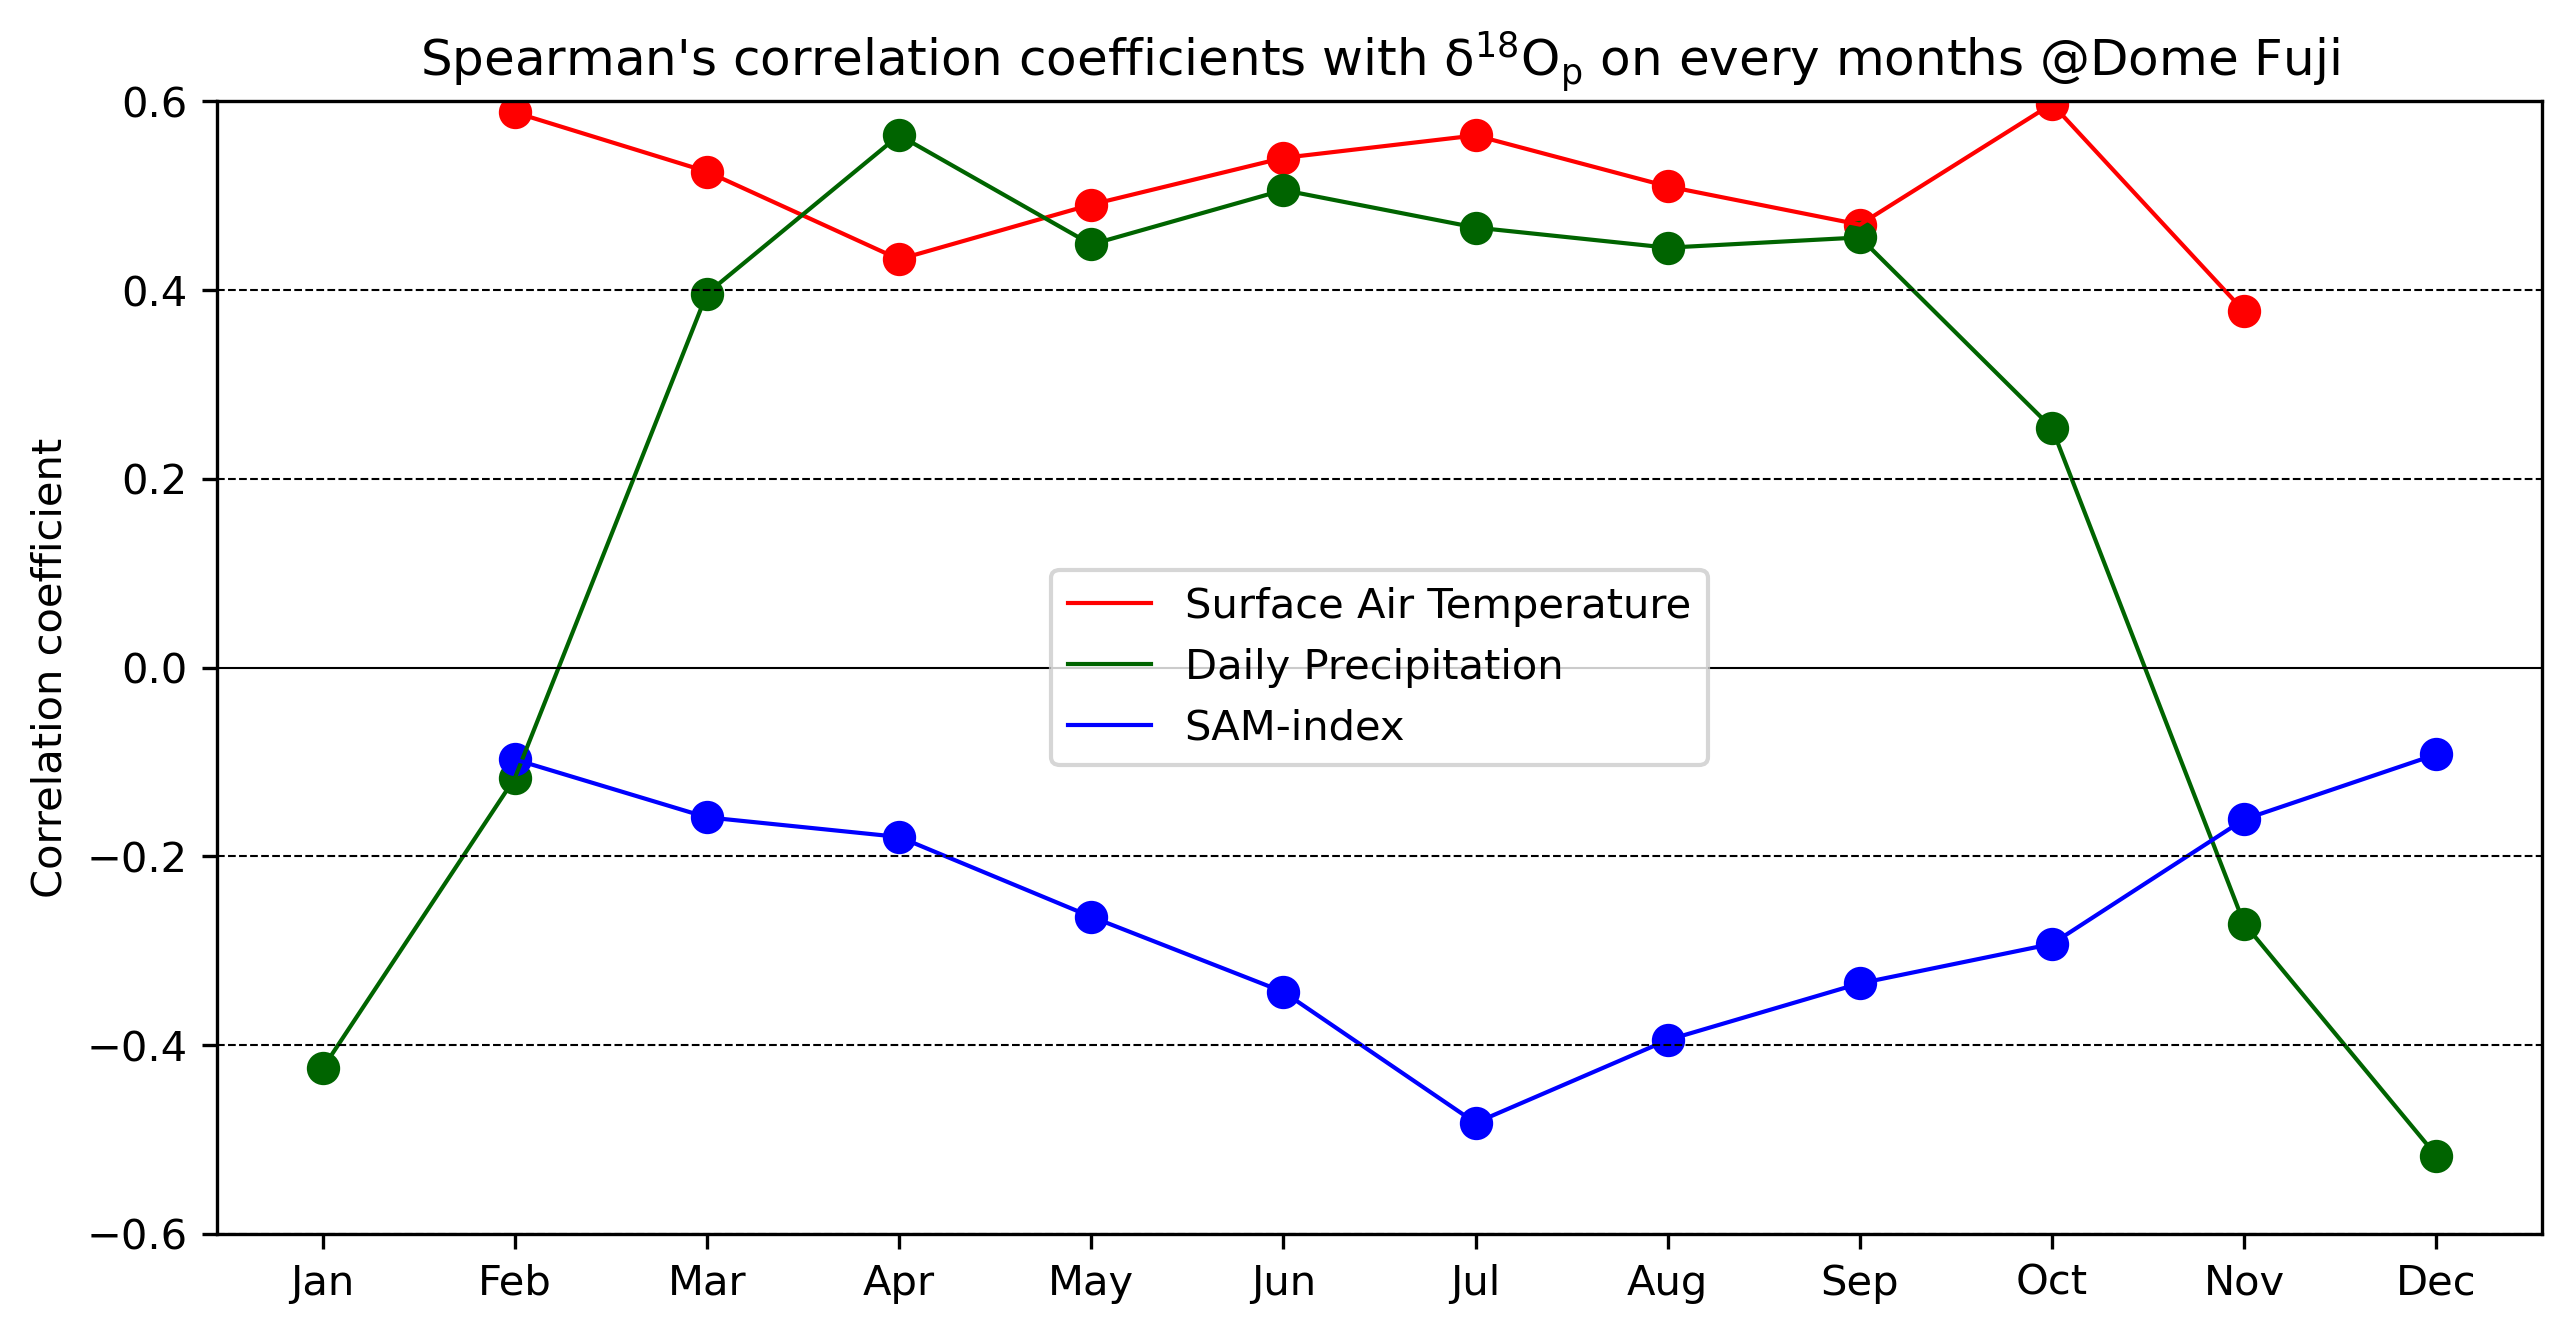

In [41]:
df_spearmanr = pd.DataFrame(
    data=[num,
          spearmanr(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","temp"]],"temp","d18O").T["p"].values,
          spearmanr(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["p"].values,
          spearmanr(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["p"].values
         ],
    index=["Number","corr_temp","p_temp", "corr_prcp", "p_prcp", "corr_sam", "p_sam"],
    columns=mons["name"][:12]).T

df_spearmanr["corr_temp"][df_spearmanr["p_temp"]>p_value] = np.nan
df_spearmanr["corr_prcp"][df_spearmanr["p_prcp"]>p_value] = np.nan
df_spearmanr["corr_sam" ][df_spearmanr["p_sam" ]>p_value] = np.nan
#
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_spearmanr)
plt.title("Spearman's correlation coefficients with $\mathsf{\delta^{18}O_p}$ on every months @Dome Fuji")
plt.show()
fig.savefig("correlation_spearman_raw.png")

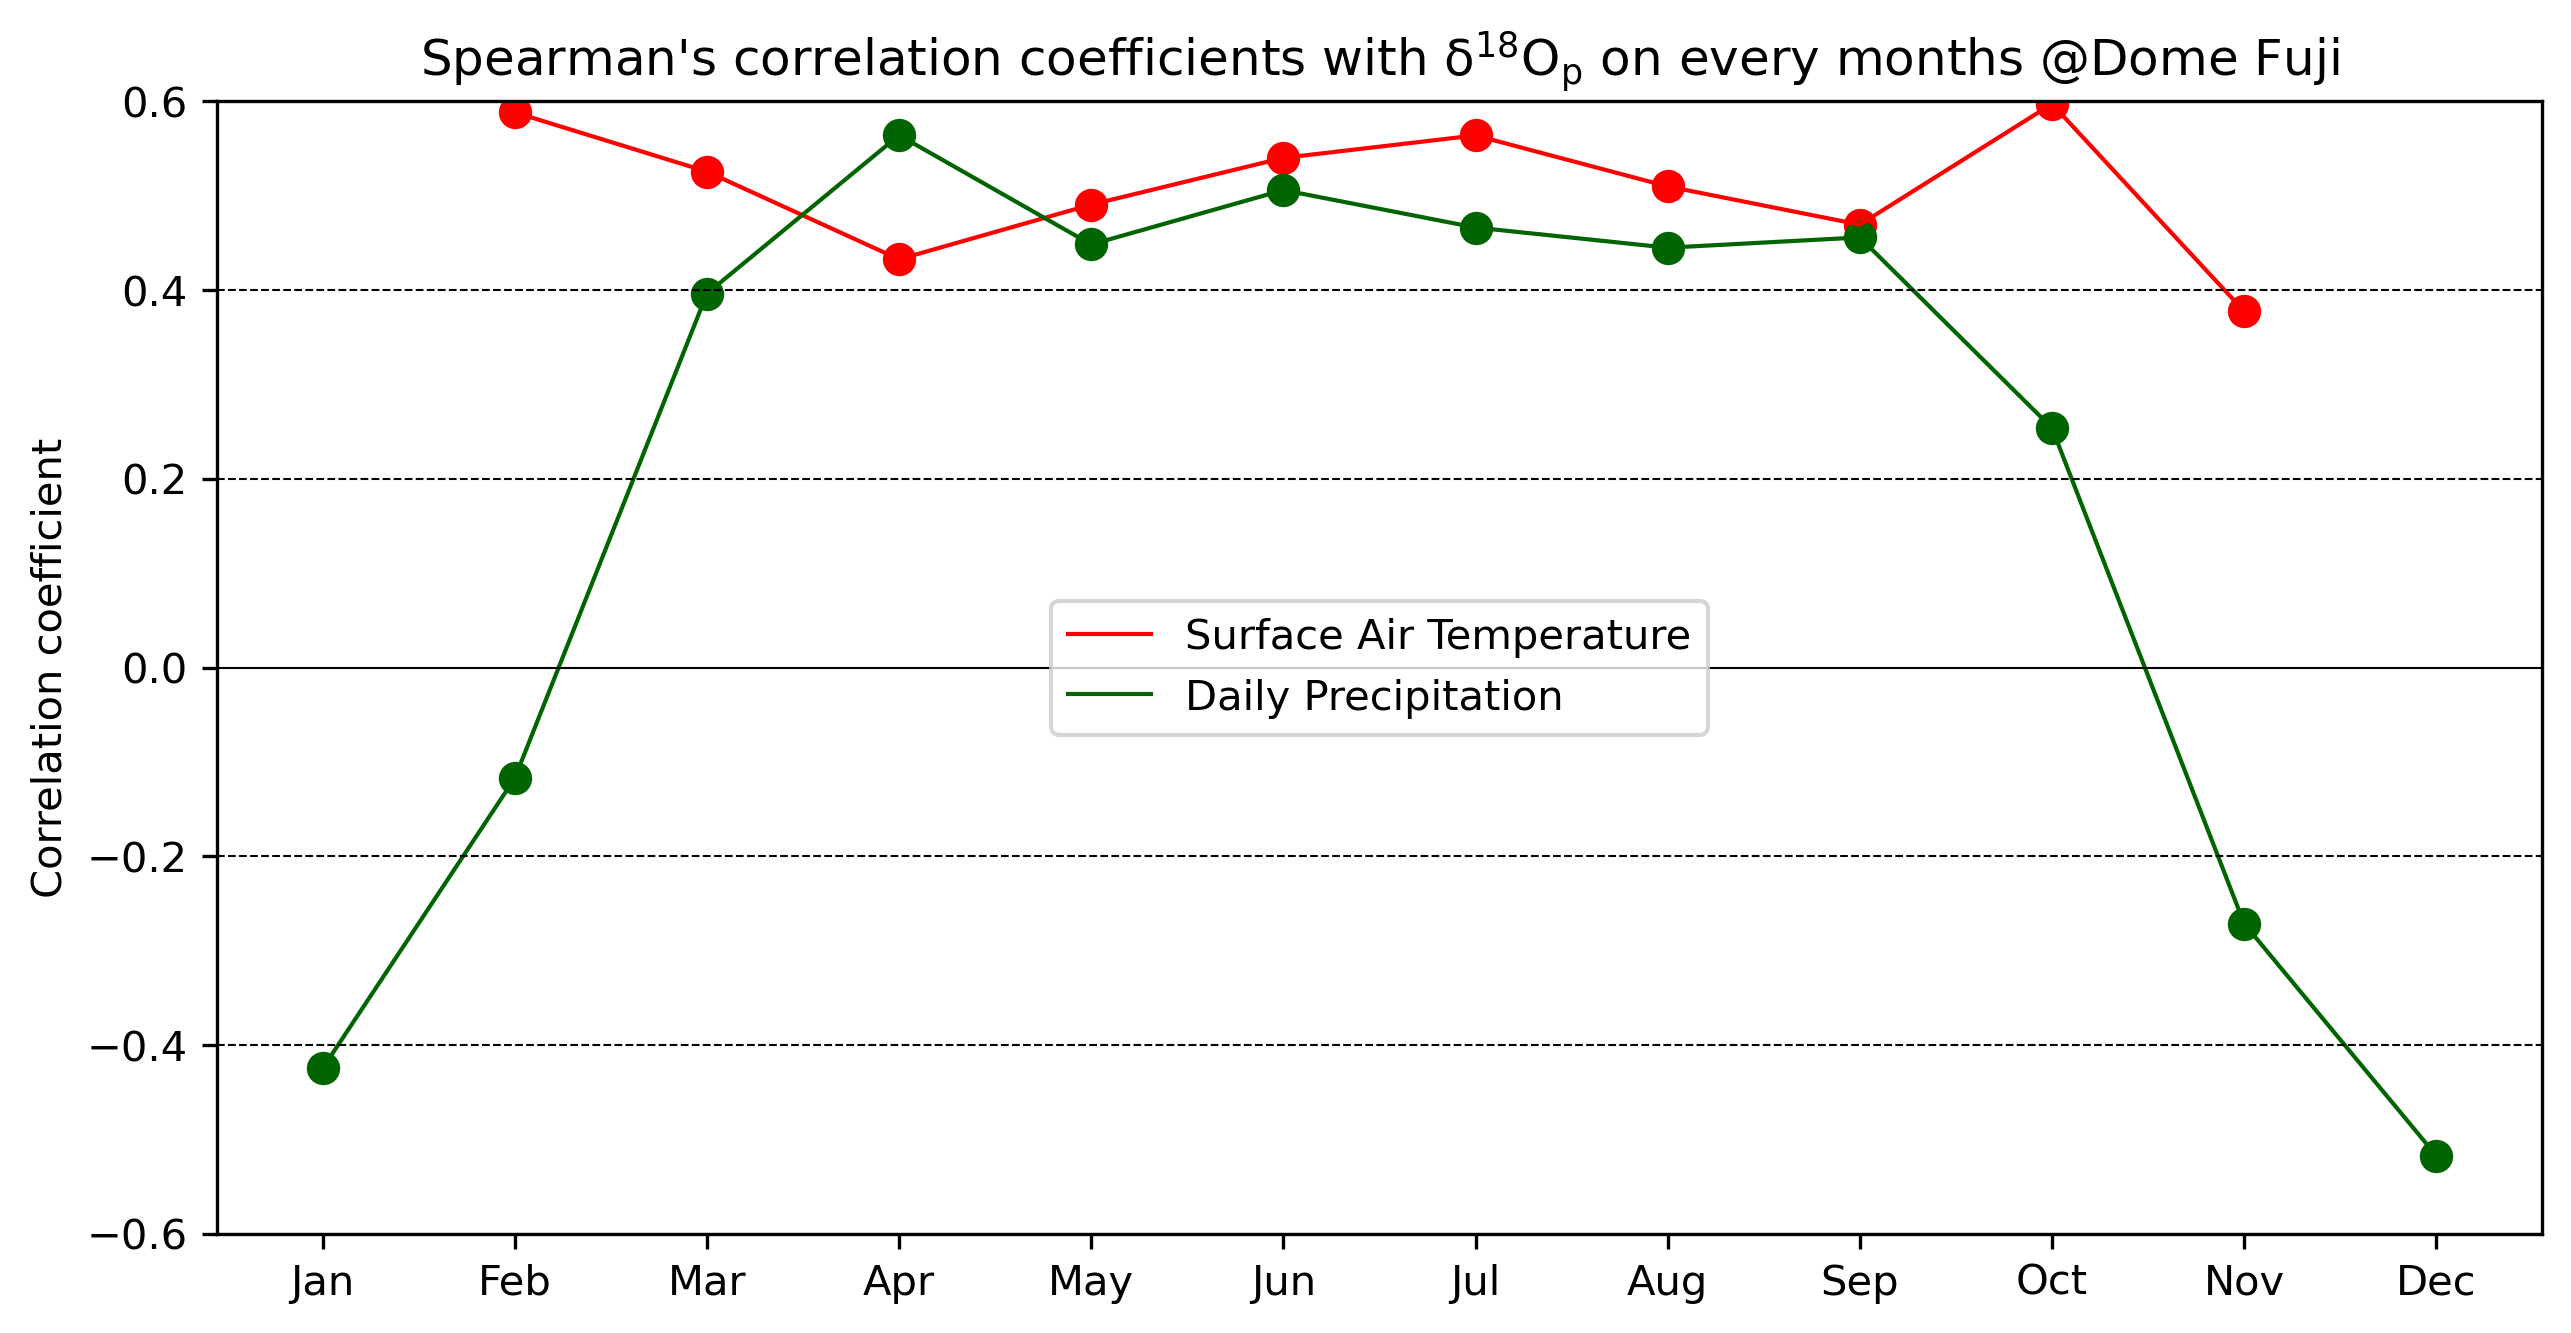

In [42]:
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O3(df_spearmanr)
plt.title("Spearman's correlation coefficients with $\mathsf{\delta^{18}O_p}$ on every months @Dome Fuji")
plt.show()
fig.savefig("correlation4TP_spearman.png")

In [43]:
df_spearmanr["Number"]=df_spearmanr["Number"].astype("int")
df_spearmanr[["corr_temp","corr_prcp","corr_sam"]]=df_spearmanr[["corr_temp","corr_prcp","corr_sam"]].round(3)
df_spearmanr.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,9.300000e+02,8.470000e+02,9.300000e+02,9.000000e+02,9.260000e+02,8.960000e+02,9.220000e+02,9.230000e+02,8.840000e+02,8.530000e+02,8.930000e+02,9.300000e+02
corr_temp,NaN,5.880000e-01,5.260000e-01,4.330000e-01,4.910000e-01,5.400000e-01,5.640000e-01,5.100000e-01,4.690000e-01,5.970000e-01,3.780000e-01,NaN
p_temp,3.799773e-01,5.224214e-80,3.639227e-67,2.398774e-42,3.082615e-57,5.531918e-69,1.664361e-78,3.205551e-62,1.254245e-49,1.383105e-83,1.236230e-31,8.461360e-01
corr_prcp,-4.250000e-01,-1.170000e-01,3.960000e-01,5.640000e-01,4.480000e-01,5.060000e-01,4.660000e-01,4.450000e-01,4.560000e-01,2.540000e-01,-2.710000e-01,-5.170000e-01
p_prcp,5.147841e-42,6.319619e-04,2.433688e-36,9.578283e-77,5.550266e-47,2.094194e-59,5.950392e-51,4.482199e-46,1.474324e-46,5.175556e-14,1.595220e-16,9.610585e-65
corr_sam,NaN,-9.700000e-02,-1.590000e-01,-1.790000e-01,-2.640000e-01,-3.440000e-01,-4.820000e-01,-3.950000e-01,-3.350000e-01,-2.930000e-01,-1.610000e-01,-9.200000e-02
p_sam,1.005795e-01,4.590231e-03,1.159339e-06,5.958432e-08,3.107025e-16,3.101589e-26,6.430146e-55,9.366783e-36,1.430794e-24,2.511139e-18,1.354551e-06,4.999589e-03


In [44]:
def kendalltau(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.kendalltau(df[var1],df[var2])
    return df_out.T

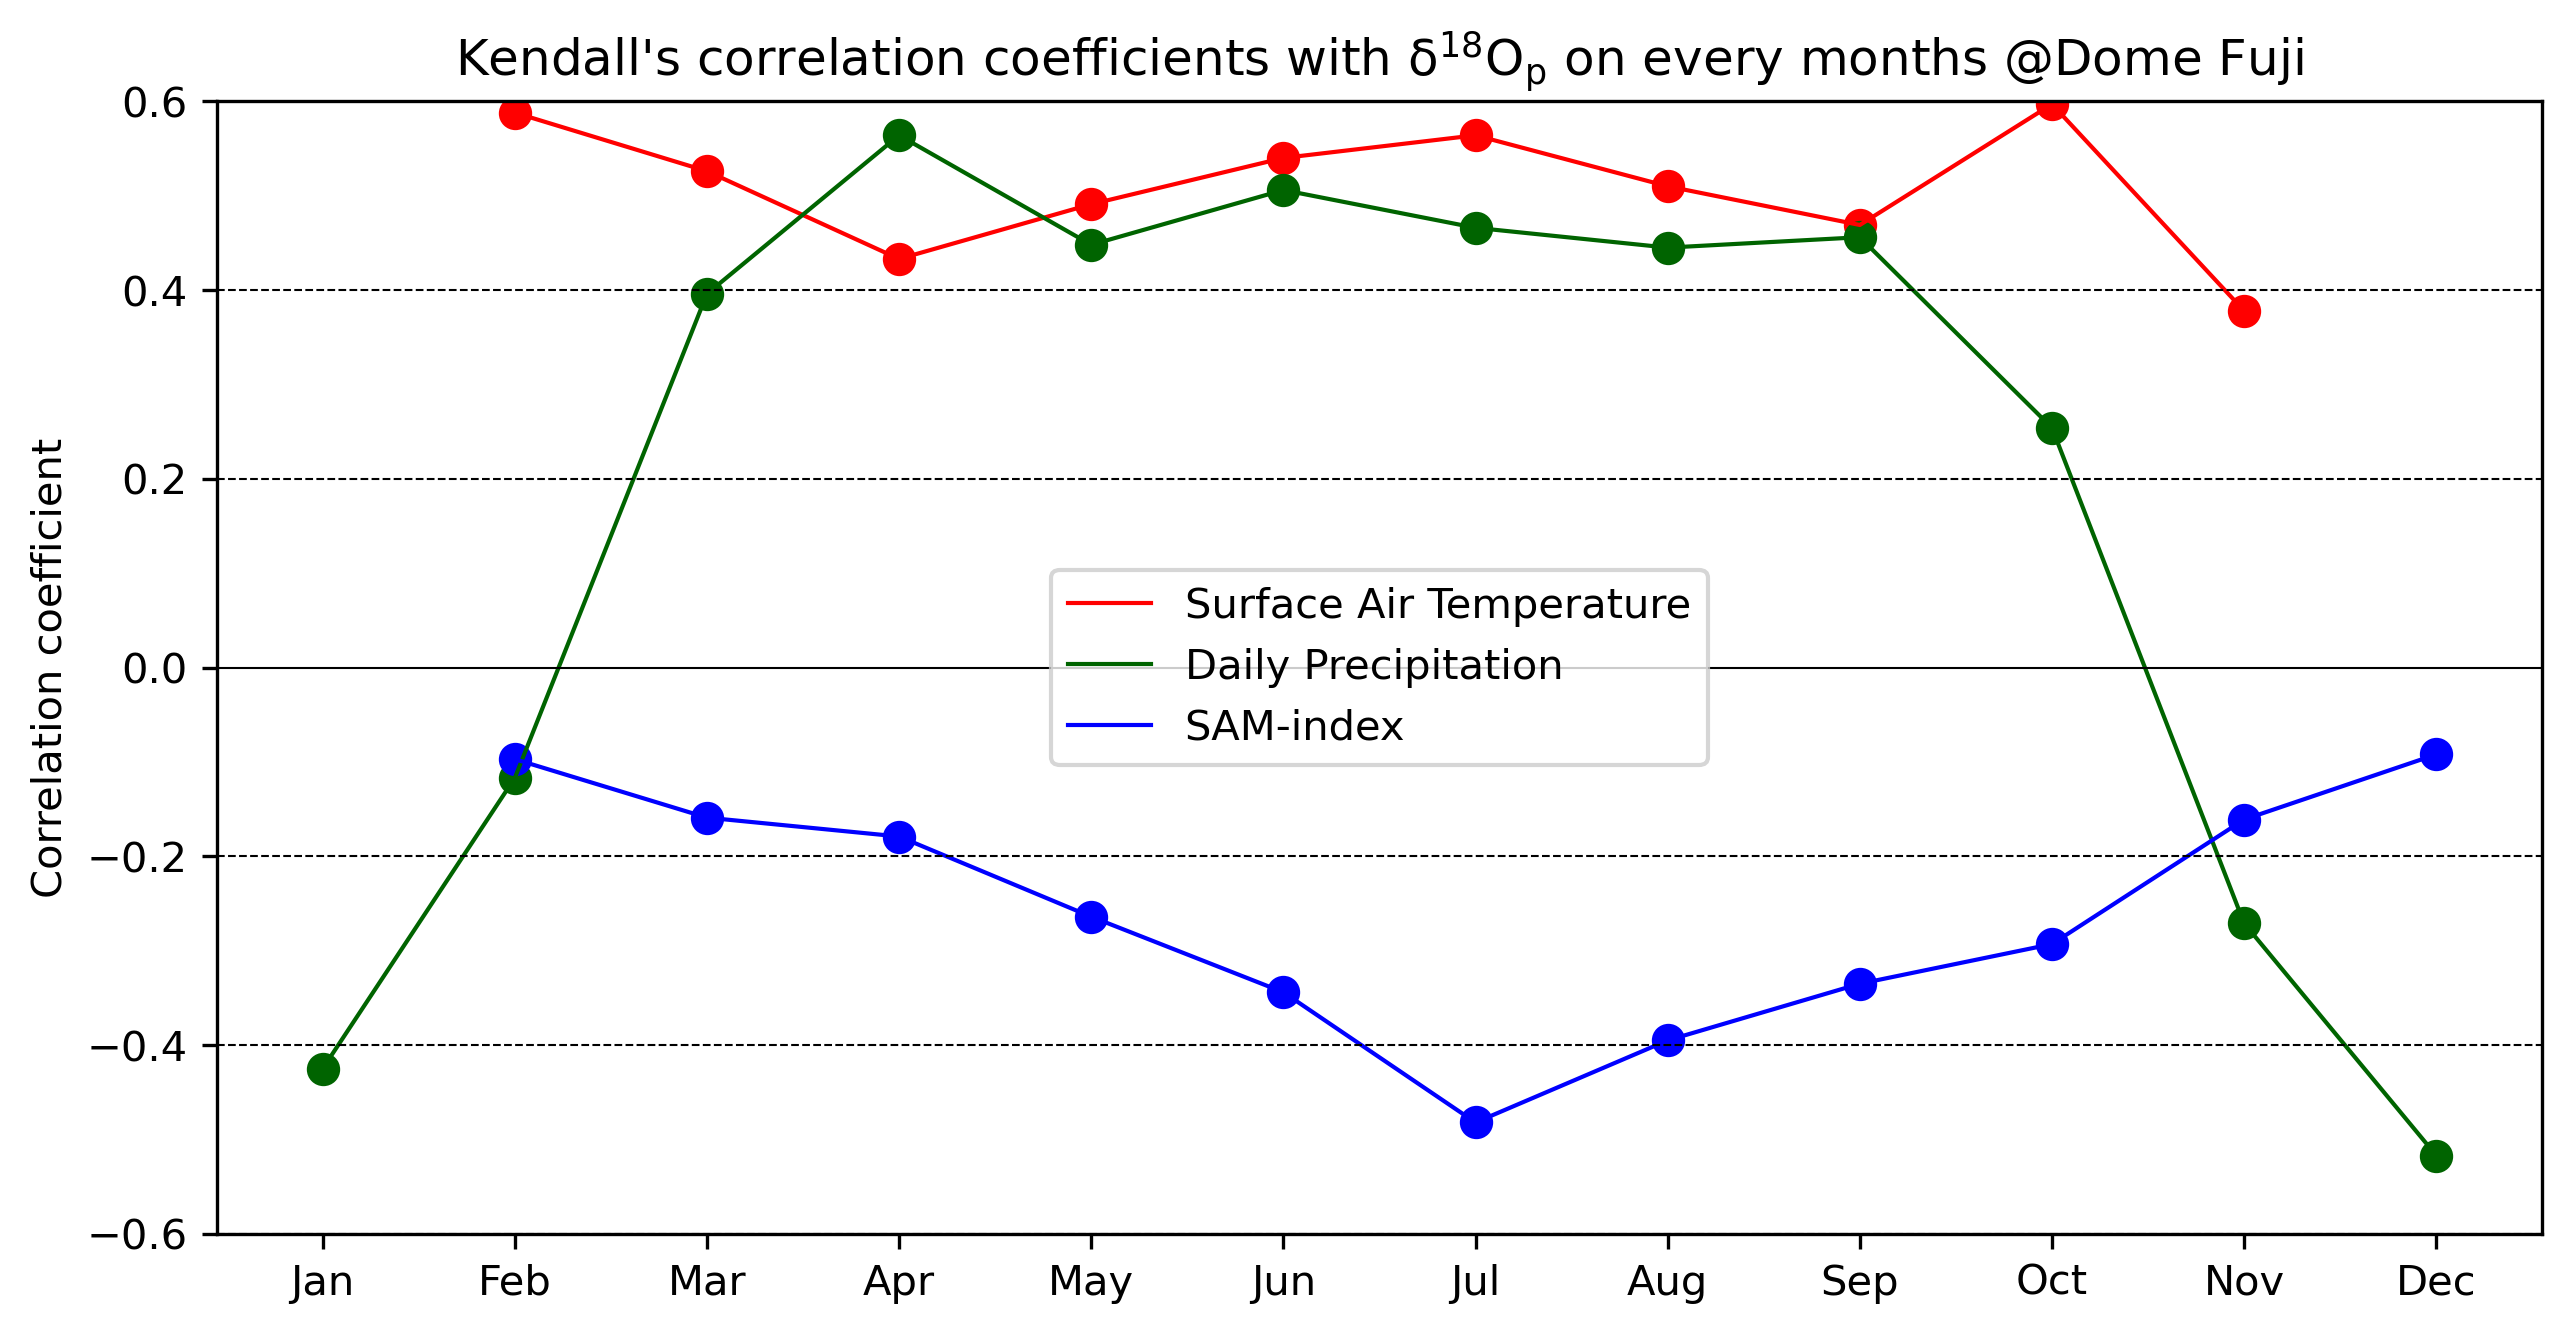

In [45]:
df_kendalltau = pd.DataFrame(
    data=[num,
          kendalltau(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","temp"]],"temp","d18O").T["p"].values,
          kendalltau(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["p"].values,
          kendalltau(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["p"].values
         ],
    index=["Number","corr_temp","p_temp", "corr_prcp", "p_prcp", "corr_sam", "p_sam"],
    columns=mons["name"][:12]).T
df_kendalltau["corr_temp"][df_kendalltau["p_temp"]>p_value] = np.nan
df_kendalltau["corr_prcp"][df_kendalltau["p_prcp"]>p_value] = np.nan
df_kendalltau["corr_sam" ][df_kendalltau["p_sam" ]>p_value] = np.nan
#
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_spearmanr)
plt.title("Kendall's correlation coefficients with $\mathsf{\delta^{18}O_p}$ on every months @Dome Fuji")
plt.show()
fig.savefig("correlation_kendall.png")    

In [46]:
df_kendalltau["Number"]=df_spearmanr["Number"].astype("int")
df_kendalltau[["corr_temp","corr_prcp","corr_sam"]]=df_kendalltau[["corr_temp","corr_prcp","corr_sam"]].round(3)
df_kendalltau

,Number,corr_temp,p_temp,corr_prcp,p_prcp,corr_sam,p_sam
name,,,,,,,
Jan,930,NaN,3.303895e-01,-0.292,1.876904e-40,NaN,1.022549e-01
Feb,847,0.409,4.713870e-71,-0.071,2.089669e-03,-0.065,4.388042e-03
Mar,930,0.366,1.265746e-62,0.276,1.701095e-36,-0.106,1.190322e-06
Apr,900,0.300,2.161544e-41,0.393,1.172406e-69,-0.120,6.858165e-08
May,926,0.344,1.794999e-55,0.307,2.190471e-44,-0.179,3.617573e-16
Jun,896,0.376,9.418651e-64,0.352,3.675276e-56,-0.235,7.601499e-26
Jul,922,0.396,2.671948e-72,0.328,2.784248e-50,-0.330,7.665561e-51
Aug,923,0.354,2.590350e-58,0.307,1.952453e-44,-0.270,9.945660e-35
Sep,884,0.324,2.893305e-47,0.312,6.435353e-44,-0.225,1.148683e-23


Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)